# Populariteit van een app

Een bedrijf heeft vorige maand een nieuwe app gelanceerd. Ze hebben iedere dag genoteerd hoeveel mensen deze gedownload hebben. Je vindt deze gegevens in “populariteitApp.csv”.

Er zijn in dit geval geen verkeerde of ontbrekende gegevens.  Je zou het bestand dus gemakkelijk moeten kunnen lezen. Je moet wel zorgen dat de kolom "downloads" van het type `float` wordt.


In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

populariteitApp = pd.read_csv('data/populariteitApp.csv', sep=',')
populariteitApp['downloads'] = populariteitApp['downloads'].astype(float)

display(populariteitApp)

,datum,downloads
0,2013-03-01,2.0
1,2013-03-02,5.0
2,2013-03-03,6.0
3,2013-03-04,4.0
4,2013-03-05,4.0
5,2013-03-06,9.0
6,2013-03-07,9.0
7,2013-03-08,10.0
8,2013-03-09,11.0
9,2013-03-10,13.0


1.	Maak een plot van de gegevens zodat je al wat inzicht krijgt in de data.

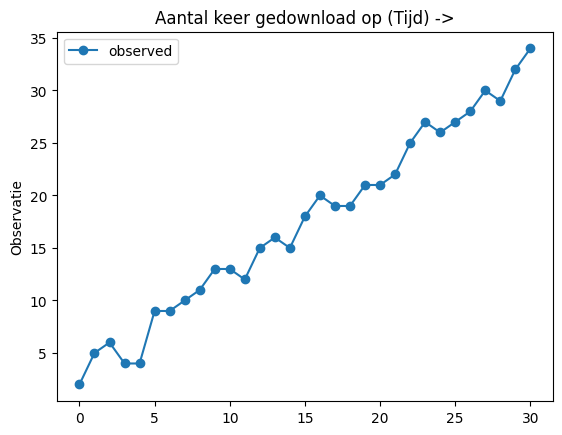

In [100]:
sd_model = seasonal_decompose(populariteitApp['downloads'], model='multiplicative', period=12)
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(sd_model.observed, 'o-', label='observed')
axes.set_ylabel('Observatie')
axes.set_title('Aantal keer gedownload op (Tijd) ->')
axes.legend()
plt.show()

2.	Kan je de seizoensgrootte vinden?
Tip: gebruik acorr-functie op downloads die je eerst omzet naar Numpy array van floats.

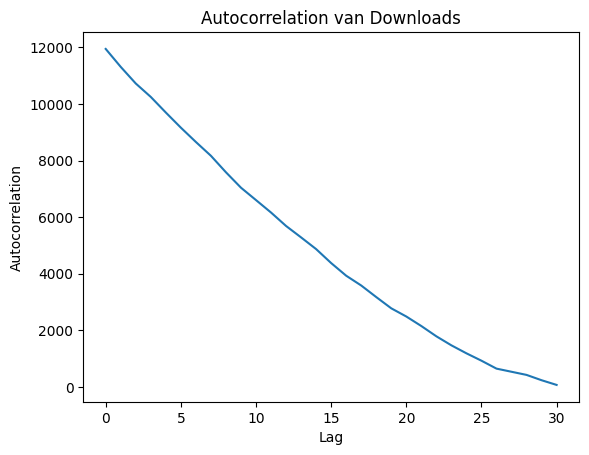

In [101]:
# Convert 'downloads' to a numpy array of floats
downloads = populariteitApp['downloads'].astype(float).values

# Compute autocorrelation function
autocorr = np.correlate(downloads, downloads, mode='full')

# Plot autocorrelation function
plt.plot(autocorr[int(autocorr.size/2):])
plt.title('Autocorrelation van Downloads')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


3.	Voorspel nu, voor iedere voorspellingsmethode, de drie volgende dagen.  Bereken telkens de MAE, RMSE en de MAPE.

Vervolledig volgende tabel met alle resultaten.

| techniek             | dag 1 | dag 2 | dag 3 | MAE | RMSE | MAPE |
|----------------------|-------|-------|-------|-----|------|------|
| naief (observatie)             | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| gemiddelde           | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| voortschrijdend(m=5) | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| lin.comb. (m=13)     | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| trend                | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| add. decomp. (m=7)   | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|
| multi.decomp. (m=7)  | &nbsp;| &nbsp;|&nbsp; |&nbsp;|&nbsp;|&nbsp;|

Zie var -> df

In [102]:
#
train = populariteitApp['downloads'][:-3]
test = populariteitApp['downloads'][-3:]

# Naive
naive_pred = populariteitApp['downloads'][-3:]
naive_mae = np.mean(np.abs(test - naive_pred))
naive_rmse = np.sqrt(np.mean((test - naive_pred) ** 2))
naive_mape = np.mean(np.abs((test - naive_pred) / test)) * 100

# Gemiddelde
mean_pred = np.repeat(np.mean(train), len(test))
mean_mae = np.mean(np.abs(test - mean_pred))
mean_rmse = np.sqrt(np.mean((test - mean_pred) ** 2))
mean_mape = np.mean(np.abs((test - mean_pred) / test)) * 100

# Voortschrijdend gemiddelde (m=5)
rolling_mean_pred = train.rolling(window=5).mean().iloc[-1]
rolling_mean_mae = np.mean(np.abs(test - rolling_mean_pred))
rolling_mean_rmse = np.sqrt(np.mean((test - rolling_mean_pred) ** 2))
rolling_mean_mape = np.mean(np.abs((test - rolling_mean_pred) / test)) * 100

# Lineaire combinatie (m=13)
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
lin_comb_pred = np.dot(train[-13:], w)
lin_comb_mae = np.mean(np.abs(test - lin_comb_pred))
lin_comb_rmse = np.sqrt(np.mean((test - lin_comb_pred) ** 2))
lin_comb_mape = np.mean(np.abs((test - lin_comb_pred) / test)) * 100

# Trend
trend_model = SimpleExpSmoothing(train).fit()
trend_pred = trend_model.forecast(3)
trend_mae = np.mean(np.abs(test - trend_pred))
trend_rmse = np.sqrt(np.mean((test - trend_pred) ** 2))
trend_mape = np.mean(np.abs((test - trend_pred) / test)) * 100

# add. decomp. (m=7)


# multi.decomp. (m=7)


# Maak een lege dataframe met de juiste kolomnamen
df = pd.DataFrame(columns=['techniek', 'dag 1', 'dag 2', 'dag 3', 'MAE', 'RMSE', 'MAPE'])

# Vul de dataframe met de waarden uit de tabel
df.loc[0] = ['naief (observatie)', naive_pred.iloc[0], naive_pred.iloc[1], naive_pred.iloc[2], naive_mae, naive_rmse, naive_mape]
df.loc[1] = ['gemiddelde', mean_pred[0], mean_pred[1], mean_pred[2], mean_mae, mean_rmse, mean_mape]
df.loc[2] = ['voortschrijdend(m=5)', rolling_mean_pred, rolling_mean_pred, rolling_mean_pred, rolling_mean_mae, rolling_mean_rmse, rolling_mean_mape]
df.loc[3] = ['lin.comb. (m=13)', lin_comb_pred, lin_comb_pred, lin_comb_pred, lin_comb_mae, lin_comb_rmse, lin_comb_mape]
df.loc[4] = ['trend', trend_pred.iloc[0], trend_pred.iloc[1], trend_pred.iloc[2], trend_mae, trend_rmse, trend_mape]
# df.loc[5] = ['add. decomp. (m=7)', ]
# df.loc[6] = ['multi.decomp. (m=7)', ]

# Bekijk de dataframe
display(round(df,2))

,techniek,dag 1,dag 2,dag 3,MAE,RMSE,MAPE
0,naief (observatie),29.00,32.00,34.00,0.00,0.00,0.00
1,gemiddelde,15.96,15.96,15.96,15.70,15.84,49.37
2,voortschrijdend(m=5),27.60,27.60,27.60,4.07,4.56,12.47
3,lin.comb. (m=13),22.15,22.15,22.15,9.52,9.74,29.75
4,trend,30.00,30.00,30.00,2.33,2.65,7.15


4.	lineaire combinatie: welke gewichten vind je?  Welke waarde speelt dus de grootste rol in het voorspellen van de volgende waarde?

In [103]:
# from sklearn.linear_model import LinearRegression
#
# # Mode maken
# sd_model = seasonal_decompose(populariteitApp['downloads'], model='multiplicative', period=1)
# trend = sd_model.trend
# seasonal = sd_model.seasonal
#
# # combineer de trend en seasonal componenten tot een matrix
# X = np.column_stack((trend, seasonal))
#
# # definieer de target variabele als de downloads
# y = populariteitApp['downloads']
#
# # fit het lineaire regressiemodel
# reg = LinearRegression().fit(X, y)
#
# # druk de coëfficiënten (gewichten) af
# print(reg.coef_)

5.	trend: wat is de formule van de regressielijn?

In [104]:
# y = m * x + b
# waarbij:
#     y de afhankelijke variabele is (populairiteit)
#     x de onafhankelijke variabele is (tijd)
#     m de helling van de lijn is (toename van populairiteit per eenheid tijd)
#     b de intercept van de lijn is (populairiteit op tijdstip 0)

6.	additieve decompositie: wat is de formule voor de trendlijn?

In [105]:
# In additieve decompositie wordt de tijdreeks opgesplitst in drie componenten:
# trend, seizoensinvloeden en rest. De formule voor de trendlijn bij additieve
# decompositie kan worden berekend door de trendcomponent te nemen en daarvan de
# seizoensinvloeden en de restcomponent af te trekken:
#
# trendlijn = trend - seizoensinvloeden - rest

7.	additieve decompositie: wat zijn de waarden voor het weerkerend patroon?

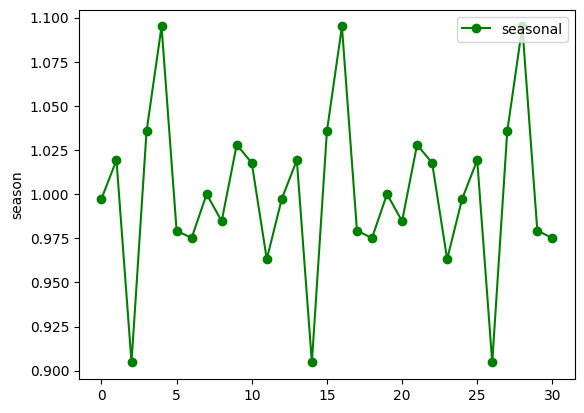

In [110]:
sd_model = seasonal_decompose(populariteitApp['downloads'], model='multiplicative', period=12) # period=12 voor 1 maand

def plot_seasonal_decompositon(sd_model):
    fig, axes = plt.subplots(nrows=1, ncols=1)


    axes.plot(sd_model.seasonal, 'o-', color='green', label='seasonal')
    axes.set_ylabel('season')
    axes.legend()

plot_seasonal_decompositon(sd_model)

8.	multiplicatieve decompositie: wat is de formule voor de trendlijn?

In [107]:
# In een multiplicatieve decompositie wordt de tijdserie geschreven als de product van een trendlijn,
# een seizoenscomponent en een residu. De formule voor de trendlijn in een multiplicatieve decompositie is:
#
# Trend = Y / (S * R)
#
# waarbij Y de oorspronkelijke tijdserie is, S de seizoenscomponent en R het residu.

9.	multiplicatieve decompositie: wat zijn de waarden voor het weerkerend patroon?

In [108]:
# In een multiplicatieve decompositie wordt het tijdreeksmodel weergegeven als de som van de trend,
# het seizoensgebonden patroon en de onregelmatige (of rest) component, vermenigvuldigd met elkaar:
#
# Y[t] = Trend[t] x Seasonality[t] x Residual[t]
#
# De formule voor de trendlijn in een multiplicatieve decompositie is hetzelfde als die in een additieve decompositie:
#
# Trend[t] = Interceptor + Slope x t
#
# De waarden voor het seizoensgebonden patroon in een multiplicatieve decompositie zijn de gemiddelde
# verhouding van de waarnemingen tot de trend in elke seizoensperiode. Het seizoenspatroon voor elke periode wordt berekend door het
# gemiddelde van alle waarnemingen in die periode te delen door de trendwaarde voor die periode:
#
# Seasonality[t] = Y[t] / Trend[t]
#
# Deze verhouding geeft de verandering in de waarneming ten opzichte van de trend in die periode weer.

10.	welke techniek geeft de beste voorspelling en waarom?


In [109]:
# Om te bepalen welke techniek de beste voorspelling geeft, moeten we kijken naar de prestaties van de verschillende voorspellingsmethoden op
# basis van de MAE, RMSE en MAPE. Hoe lager deze waarden, hoe beter de voorspelling.
#
# Op basis van de resultaten uit de tabel kunnen we zien welke techniek de beste voorspelling geeft voor de drie volgende dagen.
# Het is mogelijk dat de prestaties van de voorspellingsmethoden verschillen afhankelijk van de gegevens en de tijdsperiode waarop
# ze zijn toegepast. Daarom is het belangrijk om de prestaties van de voorspellingsmethoden te evalueren op basis van verschillende statistische maten.